### Toy ki/ni score

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load in repertoire data
os.chdir('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/preview_folder')
pt633 = pd.read_csv('P00633.tsv', sep='\t')
         

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_53233/1130900494.py:3: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  pt633 = pd.read_csv('P00633.tsv', sep='\t')


In [55]:
pt633.head()

,sample_name,species,locus,product_subtype,kit_pool,sku,test_name,sample_catalog_tags,sample_rich_tags,sample_rich_tags_json,...,cdr3_rearrangement,cdr3_amino_acid,cdr3_start_index,cdr3_rearrangement_length,chosen_v_family,chosen_v_gene,chosen_v_allele,chosen_j_family,chosen_j_gene,chosen_j_allele
0,P00633,Human,TCRB,Deep,NaN,NaN,NaN,"Ethnic Group:Unknown Ethnicity,HLA MHC class I...",NaN,NaN,...,TGTGCCAGCAGCTTGGAGGGGCGGTACCAAGAGACCCAGTACTTC,CASSLEGRYQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
1,P00633,Human,TCRB,Deep,NaN,NaN,NaN,"Ethnic Group:Unknown Ethnicity,HLA MHC class I...",NaN,NaN,...,TGTGCCAGCAGCTTGGTCTAGCGGGCCTCCTACGAGCAGTACTTC,CASSLV*RASYEQYF,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
2,P00633,Human,TCRB,Deep,NaN,NaN,NaN,"Ethnic Group:Unknown Ethnicity,HLA MHC class I...",NaN,NaN,...,TGTGCCAGCAGCTTGCAAGGGACGACTAACTATGGCTACACCTTC,CASSLQGTTNYGYTF,327.0,45,TCRBV05,5.0,1.0,TCRBJ01,2.0,1.0
3,P00633,Human,TCRB,Deep,NaN,NaN,NaN,"Ethnic Group:Unknown Ethnicity,HLA MHC class I...",NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,P00633,Human,TCRB,Deep,NaN,NaN,NaN,"Ethnic Group:Unknown Ethnicity,HLA MHC class I...",NaN,NaN,...,TGTGCCAGCAGCTTGGCATCCGACTCCTACGAGCAGTACTTC,CASSLASDSYEQYF,327.0,42,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0


In [7]:
#Load in CMV data
import os
import pandas as pd
os.chdir('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed')
cmv = pd.read_csv('CMV_clono_cdr3_count.csv', sep=',')
cmv.shape


(448, 3)

In [25]:
#Extract just the TRBs from CMV

toy_hits=cmv.loc[:,'cdr3s_aa']
cmv_tcr.head()

cmv_tcrb=cmv.apply(lambda x: re.search(r'TRB:([^;]+)', x).group(1) if 'TRB:' in x else None)

cmv_tcrb=cmv_tcrb.dropna()

unique_cmv_tcrb=cmv_tcrb.unique()


In [27]:
# Extract the sequence after "TRB:" and before ";"
cmv['TRB_extracted'] = cmv['cdr3s_aa'].str.extract(r'TRB:([^;]+)')


In [29]:
# number of unique trb extracted
unique_trb_count = cmv['TRB_extracted'].nunique()

In [30]:
unique_trb_count

30

In [ ]:
# Get a list of unique TCRs from pt633

repertoire_tcrb=pt633['cdr3_amino_acid']
unique_repertoire_tcrb = pt633['cdr3_amino_acid'].unique()

print(unique_repertoire_tcrb)


['CASSLEGRYQETQYF' 'CASSLV*RASYEQYF' 'CASSLQGTTNYGYTF' ...
 'CSAHRRESGNQPQHF' 'CATSDLGLAGVDTQYF' 'CASSTRAYLSGANVLTF']


284760

In [53]:
#Count how many matches between the two lists

matches = []
for tcr in unique_repertoire_tcrb:
    if tcr in unique_cmv_tcrb:
        matches.append(tcr)

matches

['CASSLYENTEAFF']

### Toy logistic regression based on Levenshtein

In [3]:
leven_output_path = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/leven_output.csv'

leven_output = pd.read_csv(leven_output_path)

leven_output

,patient_id,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,dist_10
0,P00492.tsv,63,1479,19582,145241,642753,1823380,NaN,NaN,NaN,NaN,NaN
1,P00412.tsv,58,1260,17169,129906,583541,1655819,NaN,NaN,NaN,NaN,NaN
2,P00416.tsv,40,1086,13695,101744,457658,1336426,NaN,NaN,NaN,NaN,NaN
3,P00037.tsv,52,1330,17539,132783,601336,1756007,NaN,NaN,NaN,NaN,NaN
4,P00346.tsv,23,509,6537,50106,222290,623861,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
287,P00518.tsv,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
288,P00132.tsv,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
289,P00471.tsv,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
290,P00133.tsv,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


Generate pos and neg file names

In [4]:
# Set HLA of interest - change dynamically
hla = 'A*02'
hla_name = hla.replace('*','')


# Generate file names

os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires")

metadata = pd.read_csv("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Cohort01_whole_metadata.tsv", sep="\t") 


metadata_annotat = metadata[metadata['sample_tags'].str.contains(f'HLA-{hla}',case=False, regex = False)]

metadata_annotat = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus|CMV\b', case=False, na=False)]
metadata_annotat = metadata_annotat.reset_index(drop=True)

#Extract pos and neg patient IDs
pos_names = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus \+|CMV \+\b', case=False, na=False)]
neg_names = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus -|CMV -\b', case=False, na=False)]

#Turn into file names
file_names = [name + '.tsv' for name in metadata_annotat['sample_name'].tolist()]
pos_names = [name + '.tsv' for name in pos_names['sample_name'].tolist()]
neg_names = [name + '.tsv' for name in neg_names['sample_name'].tolist()]


metadata_annotat.loc[10,'sample_tags']

print(f'Number of files with CMV and HLA annotation: {len(file_names)}')
print(f'Number of files with CMV +: {len(pos_names)}')
print(f'Number of files with CMV -: {len(neg_names)}')


Number of files with CMV and HLA annotation: 292
Number of files with CMV +: 136
Number of files with CMV -: 156


Clean and annotate data

In [5]:
# remove empty cols
leven_output
dist_cols = [c for c in leven_output.columns if c.startswith('dist_')]
cols_to_drop = [c for c in dist_cols if leven_output[c].isna().all()]
leven_output = leven_output.drop(columns=cols_to_drop)

In [6]:
## Add CMV status
leven_output['cmv_status'] = np.where(
    leven_output['patient_id'].isin(pos_names),
    'Positive',
    np.where(leven_output['patient_id'].isin(neg_names), 'Negative', 'unknown')
)

leven_output

,patient_id,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,cmv_status
0,P00492.tsv,63,1479,19582,145241,642753,1823380,Positive
1,P00412.tsv,58,1260,17169,129906,583541,1655819,Positive
2,P00416.tsv,40,1086,13695,101744,457658,1336426,Negative
3,P00037.tsv,52,1330,17539,132783,601336,1756007,Negative
4,P00346.tsv,23,509,6537,50106,222290,623861,Positive
...,...,...,...,...,...,...,...,...
287,P00518.tsv,0,0,0,0,0,0,Positive
288,P00132.tsv,0,0,0,0,0,0,Negative
289,P00471.tsv,0,0,0,0,0,0,Negative
290,P00133.tsv,0,0,0,0,0,0,Negative


In [7]:
base_dir = '/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Filtered'

def get_rep_len(fn):
    print(fn)
    path = os.path.join(base_dir, fn)
    try:
        rep = pd.read_csv(path, sep='\t')
    except FileNotFoundError:
        # if some files are missing, decide what you want here:
        # return 0, or np.nan, or raise
        return pd.NA

    # drop rows where amino_acid is NaN, then count sequences
    rep = rep.dropna(subset=['amino_acid'])
    print (f'Repertoire length: {len(rep)}')
    mat_size = 298 * (len(rep))
    print (f'Matrix size: {mat_size}')
    
    return mat_size

leven_output['rep_len'] = leven_output['patient_id'].apply(get_rep_len)

P00492.tsv
Repertoire length: 284350
Matrix size: 84736300
P00412.tsv
Repertoire length: 275960
Matrix size: 82236080
P00416.tsv
Repertoire length: 212178
Matrix size: 63229044
P00037.tsv
Repertoire length: 267756
Matrix size: 79791288
P00346.tsv
Repertoire length: 103760
Matrix size: 30920480
P00353.tsv
Repertoire length: 173271
Matrix size: 51634758
P00278.tsv
Repertoire length: 197888
Matrix size: 58970624
P00260.tsv
Repertoire length: 116603
Matrix size: 34747694
P00208.tsv
Repertoire length: 147490
Matrix size: 43952020
P00143.tsv
Repertoire length: 173861
Matrix size: 51810578
P00085.tsv
Repertoire length: 51217
Matrix size: 15262666
P00625.tsv
Repertoire length: 107008
Matrix size: 31888384
P00572.tsv
Repertoire length: 11177
Matrix size: 3330746
P00496.tsv
Repertoire length: 24499
Matrix size: 7300702
P00422.tsv
Repertoire length: 267623
Matrix size: 79751654
P00381.tsv
Repertoire length: 117990
Matrix size: 35161020
P00570.tsv
Repertoire length: 131414
Matrix size: 39161372
P0

In [9]:
# 1) compute cumulative dist_0–3 and turn into a proportion of rep_len
leven_output['cum_prop_0_1'] = (
    leven_output[['dist_0','dist_1']]
      .sum(axis=1)         # sum dist_0 through dist_3 for each row
    / leven_output['rep_len']         # divide by rep_len
)

# 2) pull out only the columns you asked for
new_df = leven_output[['patient_id','cum_prop_0_1','cmv_status']].copy()


lo = leven_output.copy()


In [16]:
lo

,patient_id,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,cmv_status,rep_len,cum_prop_0_1,cum_prop_0_2,cum_prop_0_3,cum_prop_0_4,cum_prop_0_5
0,P00492.tsv,63,1479,19582,145241,642753,1823380,Positive,84736300,0.000018,0.000249,0.001963,0.009549,0.031067
1,P00412.tsv,58,1260,17169,129906,583541,1655819,Positive,82236080,0.000016,0.000225,0.001804,0.008900,0.029035
2,P00416.tsv,40,1086,13695,101744,457658,1336426,Negative,63229044,0.000018,0.000234,0.001844,0.009082,0.030218
3,P00037.tsv,52,1330,17539,132783,601336,1756007,Negative,79791288,0.000017,0.000237,0.001901,0.009438,0.031445
4,P00346.tsv,23,509,6537,50106,222290,623861,Positive,30920480,0.000017,0.000229,0.001849,0.009038,0.029214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,P00518.tsv,0,0,0,0,0,0,Positive,56223958,0.000000,0.000000,0.000000,0.000000,0.000000
288,P00132.tsv,0,0,0,0,0,0,Negative,42864618,0.000000,0.000000,0.000000,0.000000,0.000000
289,P00471.tsv,0,0,0,0,0,0,Negative,20767024,0.000000,0.000000,0.000000,0.000000,0.000000
290,P00133.tsv,0,0,0,0,0,0,Negative,38447066,0.000000,0.000000,0.000000,0.000000,0.000000


Classification Report:
              precision    recall  f1-score   support

    Negative       0.56      0.79      0.65        47
    Positive       0.55      0.29      0.38        41

    accuracy                           0.56        88
   macro avg       0.55      0.54      0.52        88
weighted avg       0.55      0.56      0.53        88

ROC AUC (both features): 0.566


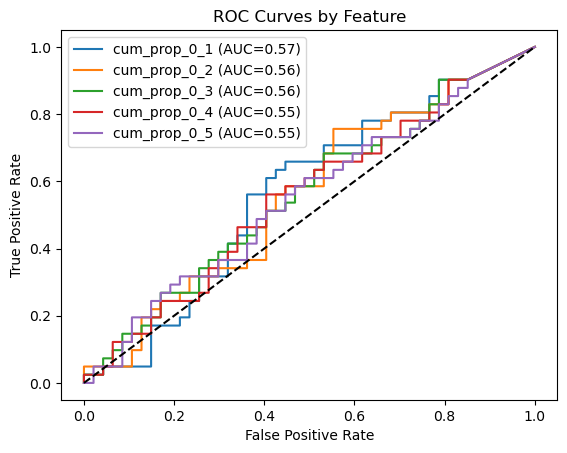

In [18]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. feature engineering
lo['cum_prop_0_1'] = (lo['dist_0'] + lo['dist_1']) / lo['rep_len']
lo['cum_prop_0_2'] = (lo['dist_0'] + lo['dist_1'] + lo['dist_2']) / lo['rep_len']
lo['cum_prop_0_3'] = (lo['dist_0'] + lo['dist_1'] + lo['dist_2'] + lo['dist_3']) / lo['rep_len']
lo['cum_prop_0_4'] = (lo['dist_0'] + lo['dist_1'] + lo['dist_2'] + lo['dist_3'] + lo['dist_4']) / lo['rep_len']
lo['cum_prop_0_5'] = (lo['dist_0'] + lo['dist_1'] + lo['dist_2'] + lo['dist_3'] + lo['dist_4'] + lo['dist_5']) / lo['rep_len']


# 2. filter to the binary classes and encode
lo_bin = lo[lo['cmv_status'].isin(['Positive','Negative'])].copy()
lo_bin['y'] = np.where(lo_bin['cmv_status']=='Positive', 1, 0)

# 2.5 define features
features = ['cum_prop_0_1','cum_prop_0_2','cum_prop_0_3','cum_prop_0_4','cum_prop_0_5']

# 3. train/test split
X = lo_bin[['cum_prop_0_1','cum_prop_0_2', 'cum_prop_0_3', 'cum_prop_0_4', 'cum_prop_0_5']]
y = lo_bin['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


# 3.5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. fit logistic regression on both features
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

# 5. predict & evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC (both features): {auc:.3f}")

# 7. ROC curves for each feature individually
plt.figure()
for i, feat in enumerate(features):
    Xi_train = X_train_scaled[:, i].reshape(-1, 1)
    Xi_test = X_test_scaled[:, i].reshape(-1, 1)

    lr = LogisticRegression(solver='liblinear')
    lr.fit(Xi_train, y_train)
    proba = lr.predict_proba(Xi_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_feat = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{feat} (AUC={auc_feat:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Feature")
plt.legend()
plt.show()

Draw some charts for this

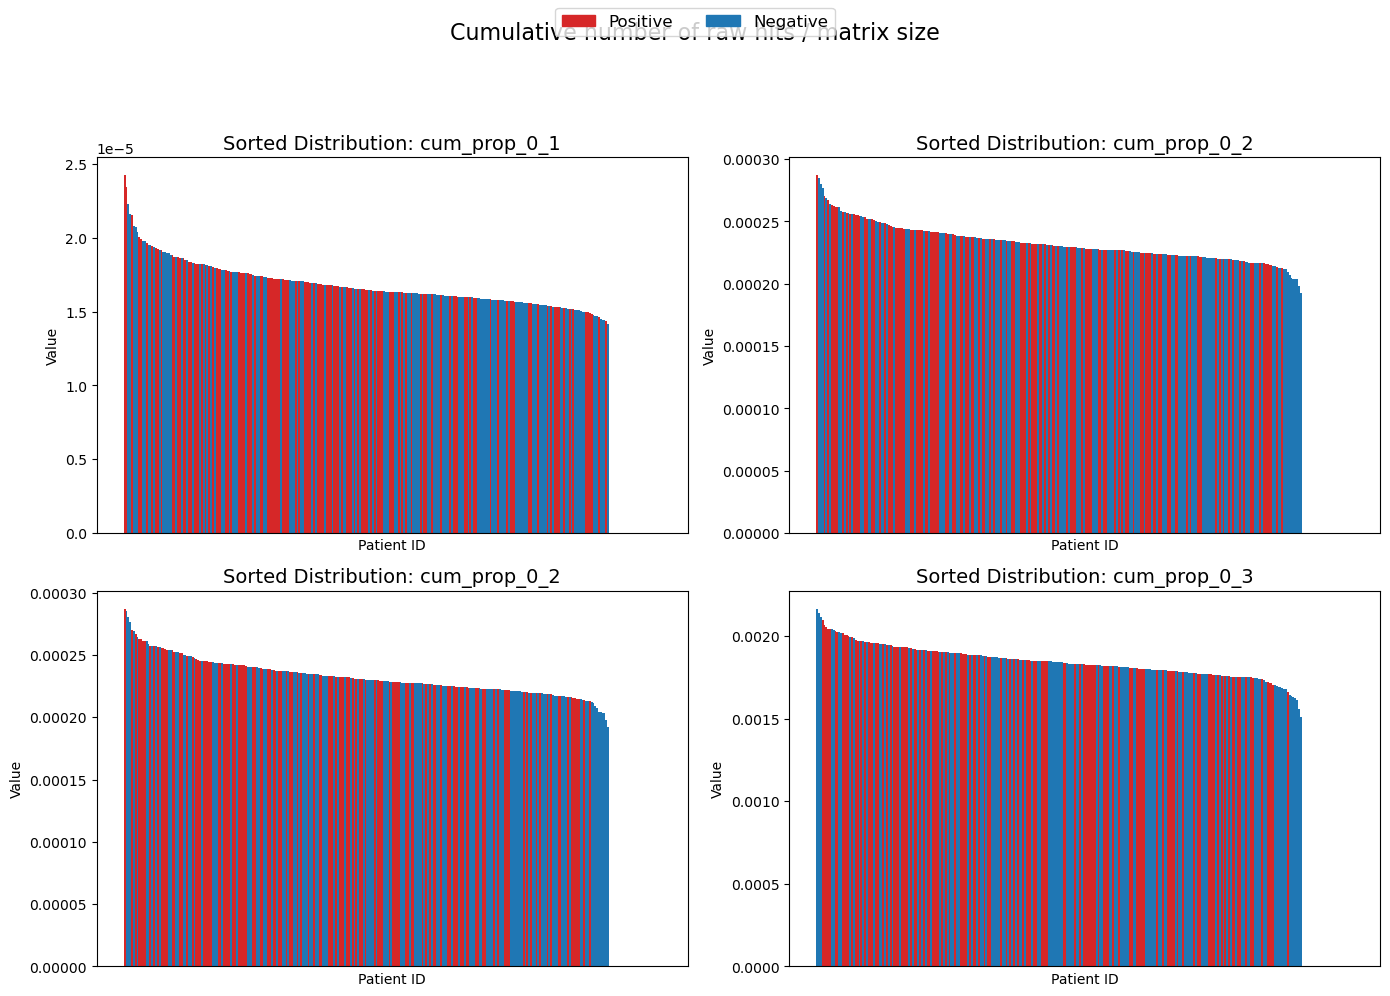

In [26]:
# change this depending on what you want to plot
df = lo


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Columns to plot
dist_cols = ['cum_prop_0_1', 'cum_prop_0_2', 'cum_prop_0_2', 'cum_prop_0_3']

# Colour map for cmv_status
status_colors = {
    'Positive': 'tab:red',
    'Negative': 'tab:blue'
}

# Create a 2×2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for ax, dist in zip(axes, dist_cols):
    # Sort rows by this dist column (largest first)
    df_sorted = df.sort_values(by=dist, ascending=False)
    
    x = df_sorted['patient_id']
    y = df_sorted[dist]
    bar_colors = df_sorted['cmv_status'].map(status_colors)
    
    ax.bar(x, y, color=bar_colors, width=1.0)
    ax.set_title(f'Sorted Distribution: {dist}', fontsize=14)
    ax.set_xlabel('Patient ID')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=90)
    # Remove x axis ticks
    ax.set_xticks([])
    

# Shared title
fig.suptitle(f'Cumulative number of raw hits / matrix size', fontsize=16)
# Shared legend
patches = [mpatches.Patch(color=col, label=status) 
           for status, col in status_colors.items()]
fig.legend(handles=patches, loc='upper center', ncol=len(status_colors), fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
